# بارگذاری و دانلود دیتاست

In [ ]:
!pip install --upgrade datasets numpy

In [ ]:
import torch
import transformers
import datasets
import numpy as np

print(f"torch version: {torch.__version__}")
print(f"transformers version: {transformers.__version__}")
print(f"datasets version: {datasets.__version__}")
print(f"numpy version: {np.__version__}")

torch version: 2.6.0+cu124
transformers version: 4.53.2
datasets version: 4.0.0
numpy version: 2.3.1


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

In [ ]:
!curl -L -o /content/roco-v2.zip https://www.kaggle.com/api/v1/datasets/download/claudiopisa9884/roco-v2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6046M  100 6046M    0     0  20.5M      0  0:04:53  0:04:53 --:--:-- 22.1M


In [ ]:
!unzip /content/roco-v2.zip -d /content/roco-v2/

Streaming output truncated to the last 5000 lines.
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_004920.jpg  
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_004921.jpg  
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_004922.jpg  
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_004923.jpg  
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_004924.jpg  
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_004925.jpg  
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_004926.jpg  
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_004927.jpg  
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_004928.jpg  
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_004929.jpg  
  inflating: /content/roco-v2/rocov2/valid_images/valid/ROCOv2_2023_valid_00493

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/roco-v2/* /content/drive/MyDrive/

In [ ]:
import pandas as pd
sample_df = pd.read_csv('/content/drive/MyDrive/rocov2/train_captions.csv')

In [ ]:
sample_df['image_filename'] = sample_df['ID'].apply(lambda x: f"{str(x).zfill(6)}.jpg")
sample_df.head()

,ID,Caption,image_filename
0,ROCOv2_2023_train_000001,Head CT demonstrating left parotiditis.,ROCOv2_2023_train_000001.jpg
1,ROCOv2_2023_train_000002,Acquired renal cysts in end-stage renal failur...,ROCOv2_2023_train_000002.jpg
2,ROCOv2_2023_train_000003,Computed tomography of the chest showing the r...,ROCOv2_2023_train_000003.jpg
3,ROCOv2_2023_train_000004,Lateral view of the sacrum showing the low con...,ROCOv2_2023_train_000004.jpg
4,ROCOv2_2023_train_000005,Thoracic CT scan showing perihilar pulmonary l...,ROCOv2_2023_train_000005.jpg


Error loading image /content/drive/MyDrive/rocov2/train_images/train/ROCOv2_2023_train_007279.jpg: [Errno 5] Input/output error: '/content/drive/MyDrive/rocov2/train_images/train/ROCOv2_2023_train_007279.jpg'


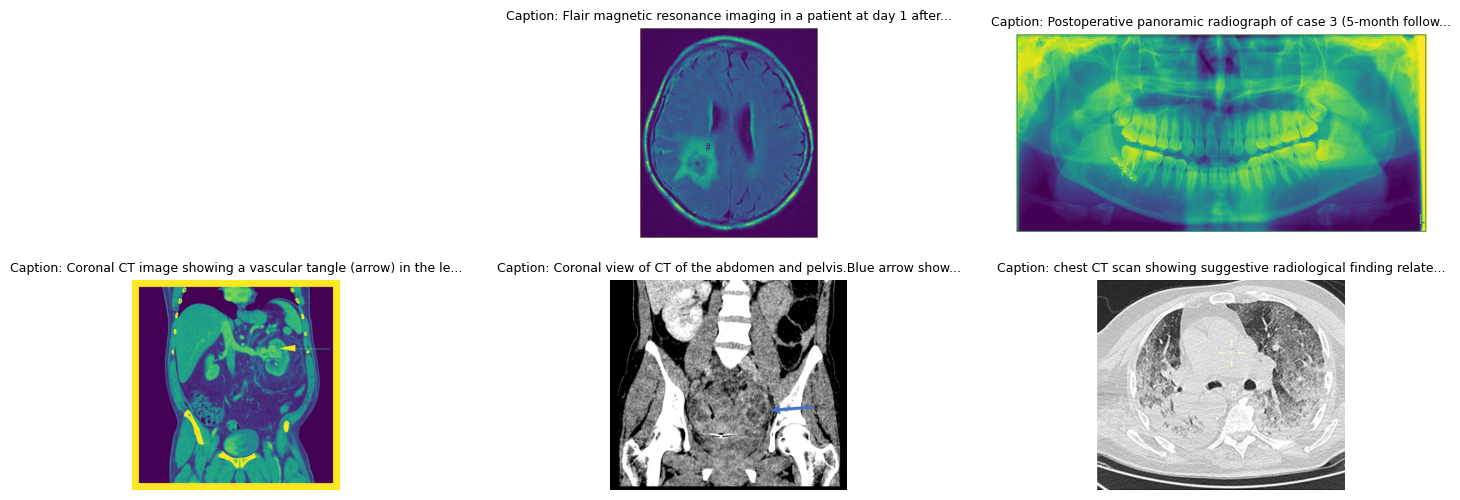

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

train_images_folder = '/content/drive/MyDrive/rocov2/train_images/train'

sample_df_display = sample_df.sample(6).reset_index(drop=True)

plt.figure(figsize=(18, 6))
for i, row in sample_df_display.iterrows():
    img_path = os.path.join(train_images_folder, row['image_filename'])
    try:
        img = Image.open(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Caption: {row['Caption'][:60]}...", fontsize=9)
        plt.axis('off')
    except FileNotFoundError:
        print(f"Image not found: {img_path}")
    except Exception as e:
        print(f"Error loading image {img_path}: {str(e)}")

# آماده‌سازی داده‌ها برای آموزش

In [ ]:
sample_df = sample_df.sample(n=10000, random_state=42).reset_index(drop=True)
sample_df.head()

,ID,Caption,image_filename
0,ROCOv2_2023_train_020342,3 mm lucent lesion in the posterior left seven...,ROCOv2_2023_train_020342.jpg
1,ROCOv2_2023_train_049436,Heterogenous hypoechoic mass at sonography.,ROCOv2_2023_train_049436.jpg
2,ROCOv2_2023_train_024744,Ultrasound image depicting dislocated right sh...,ROCOv2_2023_train_024744.jpg
3,ROCOv2_2023_train_000213,A preoperative panoramic radiograph.,ROCOv2_2023_train_000213.jpg
4,ROCOv2_2023_train_016894,"Magnetic Resonance Imaging of the orbits, show...",ROCOv2_2023_train_016894.jpg


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

texts = sample_df['Caption'].tolist()
encoded_texts = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

encoded_texts['input_ids'][0]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tensor([  101,  1017,  3461, 19913,  3372,  4649,  3258,  1999,  1996, 15219,
         2187,  5066, 19395, 11548,  2011,  2665,  8612,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

# بارگذاری مدل و آماده‌سازی داده‌ها

In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch

processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [ ]:
from PIL import Image

import os
train_images_folder = '/content/drive/MyDrive/rocov2/train_images/train'
img_path = os.path.join(train_images_folder, sample_df['image_filename'][0])
caption = sample_df['Caption'][0]

try:
    img = Image.open(img_path).convert('RGB')  # تبدیل تصویر به RGB
    inputs = processor(images=img, text=caption, return_tensors="pt")
    print(inputs.keys())
except OSError as e:
    print(f"Error opening image file {img_path}: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

KeysView({'input_ids': tensor([[32100, 32100, 32100, 32100, 32100, 32100, 32100, 32100, 32100, 32100,
         32100, 32100, 32100, 32100, 32100, 32100, 32100, 32100, 32100, 32100,
         32100, 32100, 32100, 32100, 32100, 32100, 32100, 32100, 32100, 32100,
         32100, 32100,   220,     3,   635,     3, 11525,   295,    90,  1938,
            16,     8, 29928,   646, 17353,     3,  6520, 12566,    57,  1442,
             3,  6770,     5,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-1.3397, -1.7923, -1.7777,  ..., -1.7923, -1.7923, -1.2083],
          [-1.3397, -1.7923, -1.7777,  ..., -1.7923, -1.7923, -1.2083],
          [-1.3397, -1.7923, -1.7777,  ..., -1.7923, -1.7923, -1.2083],
          ...,
          [-1.3397, -1.7923, -1.7777,  ..., -1.7923, -1.7923, -1.2083],
          [-1

#  آموزش مدل

In [ ]:
import os
import pandas as pd
from datasets import Dataset
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration, TrainingArguments, Trainer
from peft import LoraConfig, get_peft_model
import torch
from torch.utils.data import DataLoader

In [ ]:
import pandas as pd
import os
from datasets import Dataset

caption_path = "/content/drive/MyDrive/rocov2/train_captions.csv"
images_dir = "/content/drive/MyDrive/rocov2/train_images/train"

df = pd.read_csv(caption_path, header=None, names=["ID", "Caption"])
df["image_path"] = df["ID"].apply(lambda x: os.path.join(images_dir, f"{x}.jpg"))

df = df[df["image_path"].apply(os.path.exists)].reset_index(drop=True)

dataset = Dataset.from_pandas(df[["image_path", "Caption"]])

print(dataset[:5])

{'image_path': ['/content/drive/MyDrive/rocov2/train_images/train/ROCOv2_2023_train_000001.jpg', '/content/drive/MyDrive/rocov2/train_images/train/ROCOv2_2023_train_000002.jpg', '/content/drive/MyDrive/rocov2/train_images/train/ROCOv2_2023_train_000003.jpg', '/content/drive/MyDrive/rocov2/train_images/train/ROCOv2_2023_train_000004.jpg', '/content/drive/MyDrive/rocov2/train_images/train/ROCOv2_2023_train_000005.jpg'], 'Caption': ['Head CT demonstrating left parotiditis.', 'Acquired renal cysts in end-stage renal failure: 16-year-old girl with Alport syndrome and peritoneal dialysis from the age of 2\xa0years', 'Computed tomography of the chest showing the right breast nodule with irregular margins', 'Lateral view of the sacrum showing the low contrast between bone and soft tissue.', 'Thoracic CT scan showing perihilar pulmonary lymphadenomegaly']}


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img = transform(img)
img = torch.clamp(img, 0, 1)

In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from torchvision import transforms
from PIL import Image
import torch


processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl")


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def preprocess(item):
    try:

        img = Image.open(item['image_path']).convert("RGB")
        img = transform(img)


        inputs = processor(text=item['Caption'], images=img, return_tensors="pt", padding="max_length", truncation=True)

        item['pixel_values'] = inputs['pixel_values'][0]
        item['input_ids'] = inputs['input_ids'][0]
        item['attention_mask'] = inputs['attention_mask'][0]
        item['labels'] = item['input_ids']

        return item
    except Exception as e:
        print(f"Error processing item: {e}")
        return None
dataset = dataset.shuffle(seed=42)
dataset = dataset.select(range(20000))

dataset = dataset.map(preprocess, remove_columns=["image_path", "Caption"], num_proc=1)

def is_valid(item):
    return item is not None and all(key in item for key in ['pixel_values', 'input_ids', 'attention_mask', 'labels'])

dataset = dataset.filter(is_valid)

In [ ]:
from datasets import Dataset
save_path = "/content/drive/MyDrive/rocov2/processed_dataset"
dataset.save_to_disk(save_path)

In [ ]:
from datasets import Dataset
load_path = "/content/drive/MyDrive/rocov2/processed_dataset"
dataset = Dataset.load_from_disk(load_path)

In [ ]:
from peft import LoraConfig, get_peft_model

lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["query", "value"],
    lora_dropout=0.1,
)

model = get_peft_model(model, lora_config)


In [ ]:
from transformers import TrainingArguments, Trainer
from torch.utils.data import DataLoader


training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/rocov2/output',
    per_device_train_batch_size=8,
    gradient_accumulation_steps=2,
    num_train_epochs=3,
    logging_dir='/content/drive/MyDrive/rocov2/logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    data_collator=lambda data: {
        'input_ids': torch.stack([item['input_ids'] for item in data]),
        'attention_mask': torch.stack([item['attention_mask'] for item in data]),
        'labels': torch.stack([item['input_ids'] for item in data]),
    },
)


In [ ]:
print(" شروع آموزش...")
trainer.train()
print(" آموزش مدل به پایان رسید.")

In [ ]:
save_path = "/content/drive/MyDrive/blip2_roco_lora"
os.makedirs(save_path, exist_ok=True)

model.save_pretrained(save_path)
processor.save_pretrained(save_path)

print(f"مدل نهایی در '{save_path}' ذخیره شد.")

#ارزیابی و تست مدل بعد از ذخیره‌سازی

In [ ]:
!pip install -q evaluate rouge_score nltk

In [ ]:
import evaluate
from tqdm import tqdm
from PIL import Image
import torch
import pandas as pd
from transformers import Blip2Processor, Blip2ForConditionalGeneration

In [ ]:
model = Blip2ForConditionalGeneration.from_pretrained(save_path)
processor = Blip2Processor.from_pretrained(save_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
df = pd.read_csv("/content/roco-dataset/train_captions.csv", header=None, names=["filename", "caption"])
df["image_path"] = df["filename"].apply(lambda x: f"/content/roco-dataset/train_images/train/{x}.jpg")
df = df[df["image_path"].apply(os.path.exists)].reset_index(drop=True)

In [ ]:
test_df = df.sample(200).reset_index(drop=True)
predictions = []
references = []

model.eval()
for i in tqdm(range(len(test_df))):
    img_path = test_df.loc[i, "image_path"]
    ref_caption = test_df.loc[i, "caption"]
    try:
        image = Image.open(img_path).convert("RGB")
        inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
        generated_ids = model.generate(**inputs, max_new_tokens=30)
        generated_caption = processor.tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        predictions.append(generated_caption)
        references.append(ref_caption)
    except:
        continue

In [ ]:
bleu = evaluate.load("bleu")
bleu_result = bleu.compute(predictions=predictions, references=[[ref] for ref in references])

rouge = evaluate.load("rouge")
rouge_result = rouge.compute(predictions=predictions, references=references)

meteor = evaluate.load("meteor")
meteor_result = meteor.compute(predictions=predictions, references=references)

try:
    cider = evaluate.load("cider")
    cider_result = cider.compute(predictions=predictions, references=[[ref] for ref in references])
except:
    cider_result = {"CIDEr": "not available"}

print("\n نتایج ارزیابی مدل BLIP-2:")
print(f"BLEU: {bleu_result['bleu']:.4f}")
print(f"ROUGE-L: {rouge_result['rougeL']:.4f}")
print(f"METEOR: {meteor_result['meteor']:.4f}")
print(f"CIDEr: {cider_result.get('CIDEr', 'N/A')}")